# LONDON DATA ANALYSIS

In [1]:
from __future__ import print_function, division
%matplotlib inline

# import used packages and modules
# import display function to display the table of the pandas dataframe
from IPython.display import display

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.model_selection import LeaveOneOut, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from scipy import signal

from hmmlearn import hmm
from seqlearn.hmm import MultinomialHMM

import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv



/Users/mihaivisuian/miniconda3/envs/hons/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_dir = '../data/london_data/'

data = pd.read_csv(data_dir+'london_data.csv')

display(data)

,phoneTimestamp,pm1,pm2_5,pm10,bin0,bin1,bin2,bin3,bin4,bin5,...,bin11,bin12,bin13,bin14,bin15,temperature,humidity,gpsLatitude,gpsLongitude,environment_index
0,2017-11-22 07:15:23.733000,0.585578,1.316016,15.304154,53,27,34,17,10,19,...,0,1,3,0,0,19.100000,59.200001,55.958228,-3.258015,0
1,2017-11-22 07:16:04.039000,0.562118,1.034914,16.141287,61,39,32,22,4,5,...,1,1,1,0,3,19.100000,58.799999,55.958243,-3.258045,0
2,2017-11-22 07:16:41.744000,0.590277,1.259738,73.218224,75,32,25,22,10,10,...,2,6,5,4,9,19.100000,58.500000,55.958250,-3.258008,0
3,2017-11-22 07:17:18.140000,0.595709,1.939735,197.566498,80,24,21,20,10,11,...,9,15,9,13,17,19.100000,61.000000,55.958292,-3.257948,0
4,2017-11-22 07:17:51.924000,0.566274,1.399967,26.496696,62,24,23,24,13,18,...,2,0,0,3,4,19.200001,60.799999,55.958132,-3.258032,0
5,2017-11-22 07:18:28.998000,0.571203,1.125183,7.691418,58,33,29,26,8,14,...,2,0,0,0,1,19.400000,60.500000,55.958132,-3.258030,0
6,2017-11-22 07:19:05.398000,0.530408,1.099138,15.766100,53,26,30,34,17,9,...,2,1,0,2,1,19.700001,60.299999,55.958007,-3.258003,0
7,2017-11-22 07:19:45.691000,0.457555,1.024998,30.714437,52,30,28,16,9,10,...,2,5,3,2,0,19.900000,60.100002,55.958275,-3.257997,0
8,2017-11-22 07:20:24.044000,0.650228,1.563144,92.677376,70,41,38,23,16,11,...,9,8,3,8,10,20.100000,59.900002,55.958328,-3.257925,0
9,2017-11-22 07:21:02.381000,0.411910,0.884802,33.122753,55,21,20,20,10,8,...,3,2,3,3,2,20.400000,59.700001,55.958128,-3.257758,0


In [3]:
bin_vals = ['bin'+str(x) for x in range(0,16)]
pm_vals = ['pm1', 'pm2_5', 'pm10']

In [4]:
def get_time_string(date):
    return datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S.%f").time().strftime("%H:%M:%S")

In [5]:
def plot_data(dataset):
    times = list(map(lambda x: datetime.datetime.strptime(get_time_string(x), "%H:%M:%S"), dataset[0][0]['phoneTimestamp']))
    
    f, ax = plt.subplots(1, 1, figsize=(15,10))
    for d, key, label in dataset:
        if key != "":
            ax.plot(times, d[key].astype(float), label=label)
        else:
            ax.plot(times, d.astype(float), label=label)
    ax.set_xlabel("Time")
    ax.set_ylabel("Values")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.xticks(rotation=60)
    ax.legend()
    plt.show()

## PLOTS OF DATA ATTRIBUTES

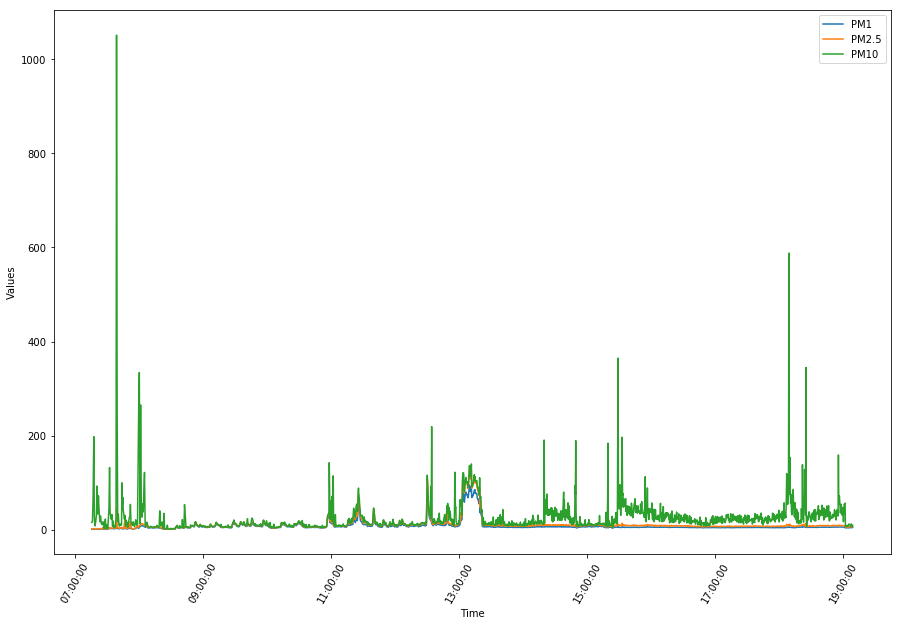

In [6]:
filtered_data = data[data['temperature'] != float("NaN")]
plot_data([
    (filtered_data, 'pm1', 'PM1'),
    (filtered_data, 'pm2_5', 'PM2.5'),
    (filtered_data, 'pm10', 'PM10')
])

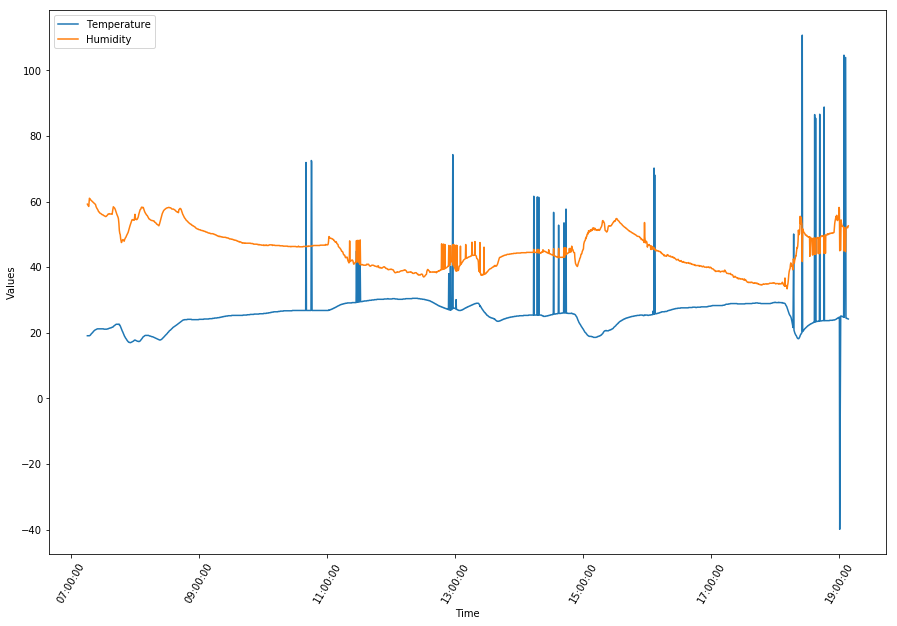

In [7]:
plot_data([
    (filtered_data, 'temperature', 'Temperature'),
    (filtered_data, 'humidity', 'Humidity')
])

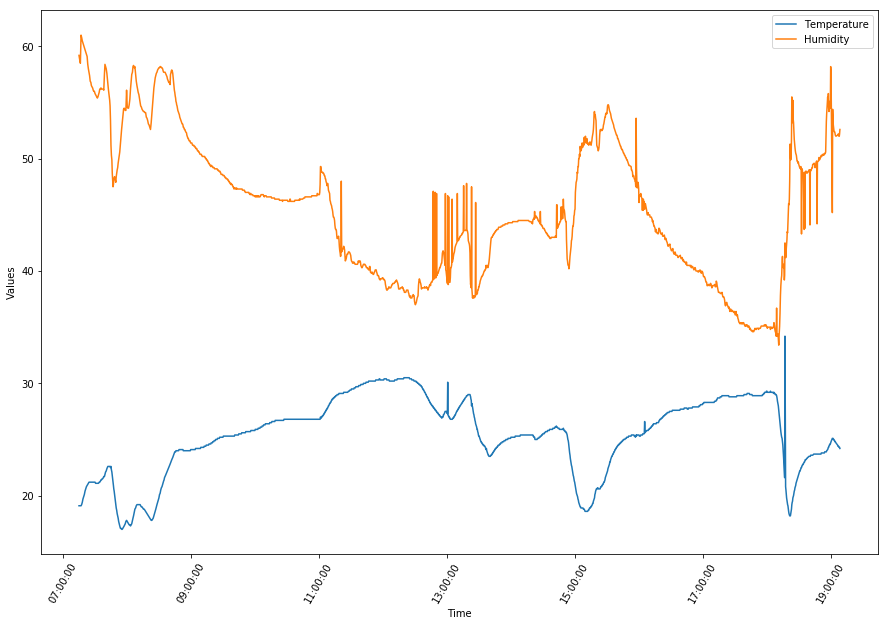

In [8]:
filtered_temps = filtered_data[(filtered_data['temperature'] > 15) & (filtered_data['temperature'] < 35)]

plot_data([
    (filtered_temps, 'temperature', 'Temperature'),
    (filtered_temps, 'humidity', 'Humidity')
])

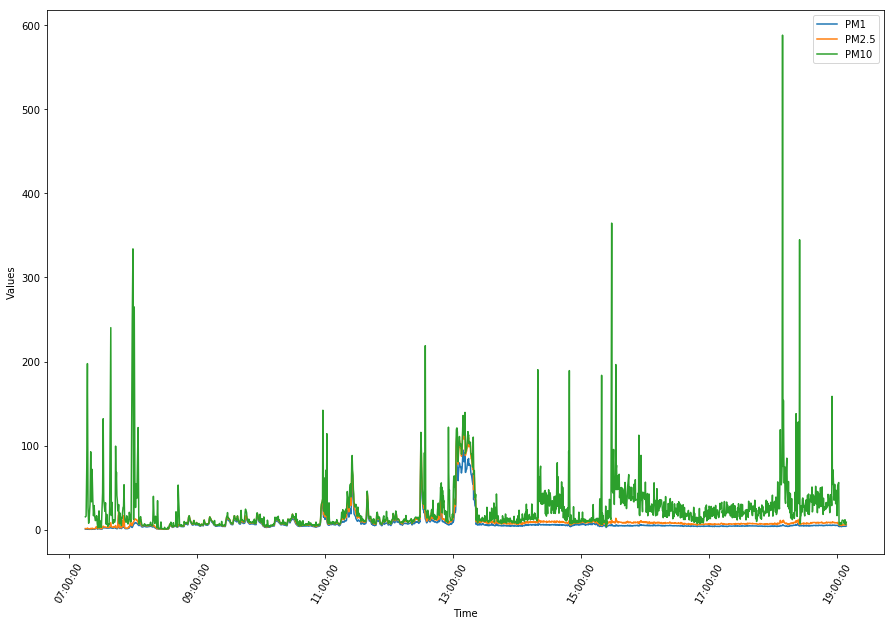

In [9]:
filtered_pms = filtered_data[(filtered_data['pm10'] < 600)]

plot_data([
    (filtered_pms, 'pm1', 'PM1'),
    (filtered_pms, 'pm2_5', 'PM2.5'),
    (filtered_pms, 'pm10', 'PM10')
])

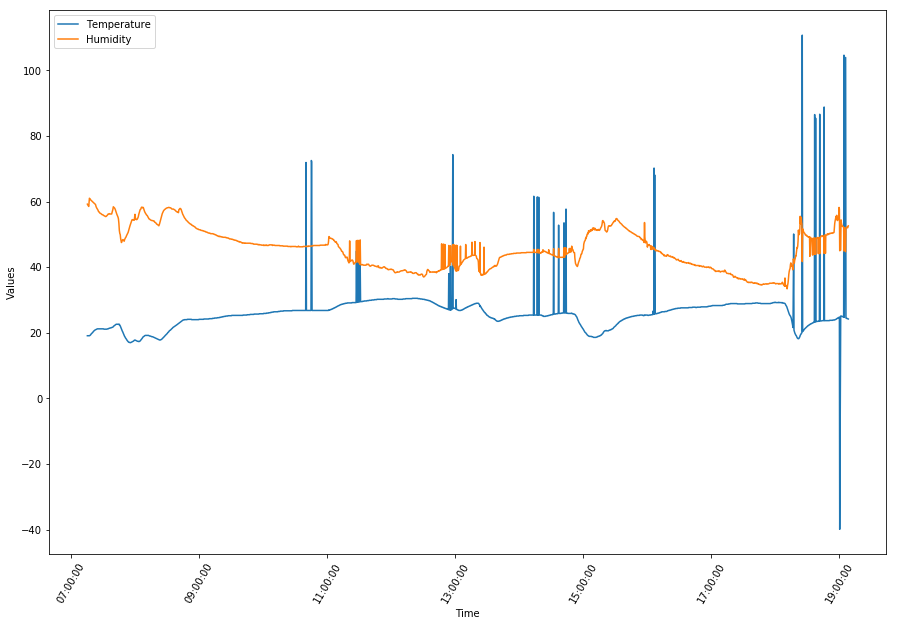

In [10]:
plot_data([
    (filtered_pms, 'temperature', 'Temperature'),
    (filtered_pms, 'humidity', 'Humidity'),
])

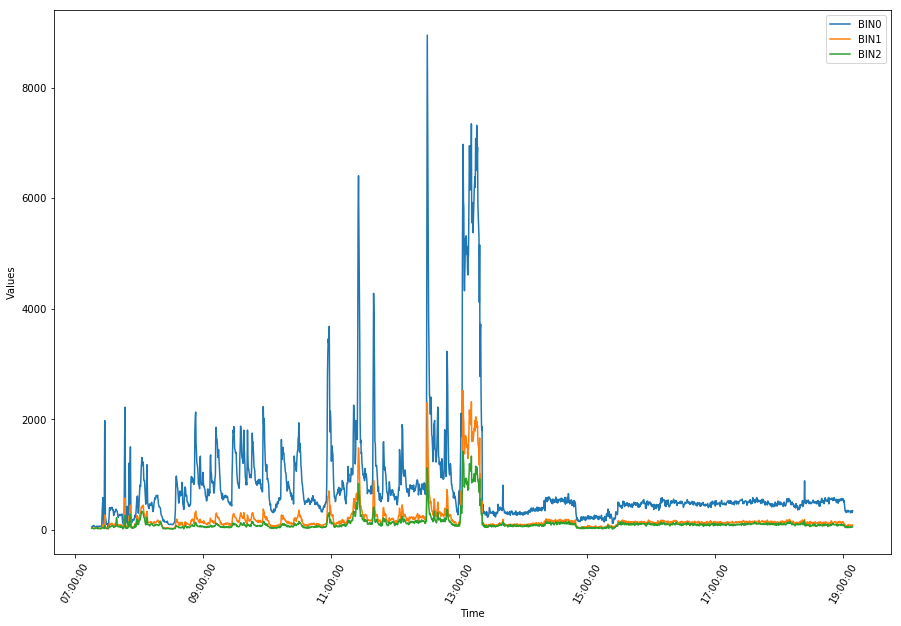

In [11]:
plot_data([
    (filtered_data, 'bin0', 'BIN0'),
    (filtered_data, 'bin1', 'BIN1'),
    (filtered_data, 'bin2', 'BIN2'),
])

In [12]:
filtered_pms.to_csv("../data/filtered_london_data.csv")

## PERFORM KMEANS

In [13]:
# method to get the cluster means of the data points based on coordinates
# and the queried columns
def get_location_cluster_means(data, cluster_no, cols):
    # obtain indices of clusters
    kmeans = KMeans(n_clusters=cluster_no, random_state=0)
    # remove data rows with null coordinates
    data = data[~np.isnan(data['gpsLatitude'])]
    # get the indices of the location based clusters
    indices = kmeans.fit_predict(data[['gpsLatitude', 'gpsLongitude']])
    freqs = np.bincount(indices)
    # initialise means of queried columns
    means = np.zeros((cluster_no, len(cols)))
    # assign clustered_indices to dataframe
    data['clustered_index'] = indices
    # compute means of queried columns
    for index in np.unique(indices):
        means[index] = np.mean(data[data['clustered_index'] == index][cols])
    return means, data

In [14]:
# method to get the clusters of the environments corresponding to the 5 environments based on
# the queried columns and number of location clusters
def get_environment_clusters(data, cluster_no, cols):
    means, d = get_location_cluster_means(data, cluster_no, cols)
    # we have 5 clusters corresponding to 6 different types of transport
    environment_kmeans = KMeans(n_clusters=6, random_state=0)
    # predict the cluster indices
    environment_indices = environment_kmeans.fit_predict(means)
    # sort the indices based on the means of the clusters
    idx = np.argsort(environment_kmeans.cluster_centers_.sum(axis=1))
    lut = np.zeros_like(idx)
    lut[idx] = np.arange(6)
    # append the indices to the dataframe
    d['unsupervised_environment_index'] = lut[environment_indices][d['clustered_index']]
    return d

In [15]:
labelled_data_unsupervised_bins = get_environment_clusters(filtered_data, 310, bin_vals)
labelled_data_unsupervised_bins

,phoneTimestamp,pm1,pm2_5,pm10,bin0,bin1,bin2,bin3,bin4,bin5,...,bin13,bin14,bin15,temperature,humidity,gpsLatitude,gpsLongitude,environment_index,clustered_index,unsupervised_environment_index
0,2017-11-22 07:15:23.733000,0.585578,1.316016,15.304154,53,27,34,17,10,19,...,3,0,0,19.100000,59.200001,55.958228,-3.258015,0,36,0
1,2017-11-22 07:16:04.039000,0.562118,1.034914,16.141287,61,39,32,22,4,5,...,1,0,3,19.100000,58.799999,55.958243,-3.258045,0,36,0
2,2017-11-22 07:16:41.744000,0.590277,1.259738,73.218224,75,32,25,22,10,10,...,5,4,9,19.100000,58.500000,55.958250,-3.258008,0,36,0
3,2017-11-22 07:17:18.140000,0.595709,1.939735,197.566498,80,24,21,20,10,11,...,9,13,17,19.100000,61.000000,55.958292,-3.257948,0,36,0
4,2017-11-22 07:17:51.924000,0.566274,1.399967,26.496696,62,24,23,24,13,18,...,0,3,4,19.200001,60.799999,55.958132,-3.258032,0,36,0
5,2017-11-22 07:18:28.998000,0.571203,1.125183,7.691418,58,33,29,26,8,14,...,0,0,1,19.400000,60.500000,55.958132,-3.258030,0,36,0
6,2017-11-22 07:19:05.398000,0.530408,1.099138,15.766100,53,26,30,34,17,9,...,0,2,1,19.700001,60.299999,55.958007,-3.258003,0,36,0
7,2017-11-22 07:19:45.691000,0.457555,1.024998,30.714437,52,30,28,16,9,10,...,3,2,0,19.900000,60.100002,55.958275,-3.257997,0,36,0
8,2017-11-22 07:20:24.044000,0.650228,1.563144,92.677376,70,41,38,23,16,11,...,3,8,10,20.100000,59.900002,55.958328,-3.257925,0,36,0
9,2017-11-22 07:21:02.381000,0.411910,0.884802,33.122753,55,21,20,20,10,8,...,3,3,2,20.400000,59.700001,55.958128,-3.257758,0,36,0


In [16]:
labelled_data_unsupervised_bins.to_csv("../data/filtered_london_data_unsupervised.csv")

In [17]:
labelled_data_unsupervised_pms = get_environment_clusters(filtered_data, 310, pm_vals)

## Supervised Classification

In [18]:
def get_training_accuracy_with_kfolds_iloc(estimator, x_tr, y_tr, kf):
    score_array = np.empty(kf.n_folds)
    
    for (idx, (train_feature, test_feature)) in enumerate(kf):
        estimator.fit(x_tr.iloc[train_feature], y_tr.iloc[train_feature])
        score_array[idx] = estimator.score(x_tr.iloc[test_feature], y_tr.iloc[test_feature])
    
    return np.mean(score_array)

In [19]:
def get_training_accuracy_with_holdout_iloc(estimator, x_tr, y_tr):
    
    x_train, x_test, y_train, y_test = train_test_split(
        x_tr, y_tr, test_size=0.25, random_state=0
    )
    estimator.fit(x_train, y_train)
    return estimator.score(x_test, y_test)

In [20]:
x_data_pms = filtered_data[["pm1", "pm2_5", "pm10"]]
x_data_bins = filtered_data[bin_vals]
x_data_temps = filtered_data[['temperature', 'humidity']]
y_data = filtered_data['environment_index']

### SVC

In [21]:
svc = SVC(kernel="rbf", gamma="auto", probability=True)
kf = KFold(len(x_data_pms), n_folds=3, shuffle=True, random_state=0)

print("Accuracy:", get_training_accuracy_with_kfolds_iloc(svc, x_data_pms, y_data, kf))

Accuracy: 0.79746835443


In [22]:
svc = SVC(kernel="rbf", gamma="auto", probability=True)
kf = KFold(len(x_data_bins), n_folds=3, shuffle=True, random_state=0)

print("Accuracy:", get_training_accuracy_with_kfolds_iloc(svc, x_data_bins, y_data, kf))

Accuracy: 0.409282700422


In [23]:
svc = SVC(kernel="rbf", gamma="auto", probability=True)
svc.fit(x_data_bins, y_data)
print("Accuracy:", svc.score(x_data_bins, y_data))

Accuracy: 1.0


In [24]:
x_data_temps = filtered_temps[['temperature', 'humidity']]

In [25]:
svc.fit(x_data_temps, filtered_temps['environment_index'])
print("Accuracy:", svc.score(x_data_temps, filtered_temps['environment_index']))

Accuracy: 0.899357601713


In [26]:
svc = SVC(kernel="rbf", gamma="auto", probability=True)
kf = KFold(len(x_data_temps), n_folds=3, shuffle=True, random_state=0)

print("Accuracy:", get_training_accuracy_with_kfolds_iloc(svc, x_data_temps, filtered_temps['environment_index'], kf))

Accuracy: 0.868303114446


In [27]:
svc = SVC(kernel="rbf", gamma="auto", probability=True)

kf = KFold(len(filtered_data[['pm1', 'pm2_5', 'pm10', 'temperature', 'humidity']]), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(svc, filtered_data[['pm1', 'pm2_5', 'pm10', 'temperature', 'humidity']], filtered_data['environment_index'], kf))

Accuracy 0.851265822785


In [28]:
svc = SVC(kernel="rbf", gamma="auto", probability=True)

kf = KFold(len(filtered_data[bin_vals+['temperature', 'humidity']]), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(svc, filtered_data[bin_vals+['temperature', 'humidity']], filtered_data['environment_index'], kf))

Accuracy 0.409282700422


### Random Forest Classifiers

In [29]:
rf = RandomForestClassifier(random_state=0, n_estimators=50)
rf.fit(x_data_pms, y_data)
print("Accuracy:", rf.score(x_data_pms, y_data))

Accuracy: 0.99947257384


In [30]:
rf = RandomForestClassifier(random_state=0, n_estimators=50)
rf.fit(x_data_temps, filtered_temps['environment_index'])
print("Accuracy:", rf.score(x_data_temps, filtered_temps['environment_index']))

Accuracy: 0.98608137045


In [31]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1)

kf = KFold(len(x_data_pms), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, x_data_pms, y_data, kf))

Accuracy 0.823839662447


In [32]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1, criterion="entropy")

kf = KFold(len(x_data_pms), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, x_data_pms, y_data, kf))

Accuracy 0.826476793249


In [33]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1)

kf = KFold(len(x_data_temps), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, x_data_temps, filtered_temps['environment_index'], kf))

Accuracy 0.92022919215


In [34]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1, criterion="entropy")

kf = KFold(len(filtered_data[['pm1', 'pm2_5', 'pm10', 'temperature', 'humidity']]), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, filtered_data[['pm1', 'pm2_5', 'pm10', 'temperature', 'humidity']], filtered_data['environment_index'], kf))

Accuracy 0.949894514768


In [35]:
rf = RandomForestClassifier(random_state=0, n_estimators=10, n_jobs=-1)

kf = KFold(len(filtered_data[['pm1', 'pm2_5', 'pm10', 'temperature', 'humidity']]), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, filtered_data[['pm1', 'pm2_5', 'pm10', 'temperature', 'humidity']], filtered_data['environment_index'], kf))

Accuracy 0.929852320675


In [36]:
rf = RandomForestClassifier(random_state=0, n_estimators=300, n_jobs=-1)

kf = KFold(len(filtered_data[['pm1', 'pm2_5', 'pm10', 'temperature', 'humidity']]), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, filtered_data[['pm1', 'pm2_5', 'pm10', 'temperature', 'humidity']], filtered_data['environment_index'], kf))

Accuracy 0.950421940928


In [37]:
rf = RandomForestClassifier(random_state=0, n_estimators=10, n_jobs=-1)

kf = KFold(len(filtered_data[bin_vals+['temperature', 'humidity']]), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, filtered_data[bin_vals+['temperature', 'humidity']], filtered_data['environment_index'], kf))

Accuracy 0.919303797468


In [38]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1, criterion='entropy')

kf = KFold(len(filtered_data[bin_vals+['temperature', 'humidity']]), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, filtered_data[bin_vals+['temperature', 'humidity']], filtered_data['environment_index'], kf))

Accuracy 0.933016877637


In [39]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1, criterion="entropy")

kf = KFold(len(x_data_temps), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, x_data_temps, filtered_temps['environment_index'], kf))

Accuracy 0.918623195512


In [40]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1)

kf = KFold(len(x_data_bins), n_folds=3, shuffle=True, random_state=0)

print("Accuracy using all bin values", get_training_accuracy_with_kfolds_iloc(rf, x_data_bins, y_data, kf))

Accuracy using all bin values 0.851265822785


In [41]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1, criterion="entropy")

kf = KFold(len(x_data_bins), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, x_data_bins, y_data, kf))

Accuracy 0.846518987342


In [42]:
x_data_3bins = x_data_bins[['bin0', 'bin1', 'bin2', 'bin3']]
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1)

kf = KFold(len(x_data_3bins), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, x_data_3bins, y_data, kf))

Accuracy 0.806962025316


### HOLDOUT VALIDATION

In [43]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1)

print("Accuracy", get_training_accuracy_with_holdout_iloc(rf, x_data_temps, filtered_temps['environment_index']))

Accuracy 0.929336188437


In [44]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1, criterion="entropy")


print("Accuracy", get_training_accuracy_with_holdout_iloc(rf, x_data_pms, y_data))

Accuracy 0.827004219409


In [45]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1, criterion="entropy")


print("Accuracy", get_training_accuracy_with_holdout_iloc(rf, x_data_bins, filtered_data['environment_index']))

Accuracy 0.852320675105


In [46]:
svc = SVC(kernel="rbf", gamma="auto", probability=True)

print("Accuracy:", get_training_accuracy_with_holdout_iloc(svc, x_data_pms, y_data))

Accuracy: 0.816455696203


In [47]:
svc = SVC(kernel="rbf", gamma="auto", probability=True)
kf = KFold(len(x_data_bins[['bin0', 'bin1', 'bin2']]), n_folds=3, shuffle=True, random_state=0)

print("Accuracy:", get_training_accuracy_with_holdout_iloc(svc, x_data_bins, filtered_data['environment_index']))

Accuracy: 0.398734177215


In [48]:
svc = SVC(kernel="rbf", gamma="auto", probability=True)
kf = KFold(len(x_data_bins[['bin0', 'bin1', 'bin2']]), n_folds=3, shuffle=True, random_state=0)

print("Accuracy:", get_training_accuracy_with_holdout_iloc(svc, x_data_bins, filtered_data['environment_index']))

Accuracy: 0.398734177215


## ENVIRONMENTS AND MODES OF TRANSPORT COMBINED

In [49]:
clustered_data = get_environment_clusters(filtered_pms, 310, pm_vals)

targets = clustered_data['environment_index']

svc = SVC(kernel="rbf", gamma="auto", probability=True)
kf = KFold(len(clustered_data), n_folds=3, shuffle=True, random_state=0)

print("Accuracy:", get_training_accuracy_with_kfolds_iloc(svc, clustered_data[pm_vals+['unsupervised_environment_index']], targets, kf))

Accuracy: 0.82269202993


In [50]:
clustered_data = get_environment_clusters(filtered_temps, 310, pm_vals)

targets = clustered_data['environment_index']

svc = SVC(kernel="rbf", gamma="auto", probability=True)
kf = KFold(len(clustered_data), n_folds=3, shuffle=True, random_state=0)

print("Accuracy:", get_training_accuracy_with_kfolds_iloc(svc, clustered_data[pm_vals+['temperature', 'humidity', 'unsupervised_environment_index']], targets, kf))

Accuracy: 0.88115452836


In [51]:
clustered_data = get_environment_clusters(filtered_temps, 310, pm_vals)

targets = clustered_data['environment_index']

svc = SVC(kernel="rbf", gamma="auto", probability=True)
kf = KFold(len(clustered_data), n_folds=3, shuffle=True, random_state=0)

print("Accuracy:", get_training_accuracy_with_kfolds_iloc(svc, clustered_data[['unsupervised_environment_index', 'temperature', 'humidity']], targets, kf))

Accuracy: 0.917007736654


## BIN VALUES PATTERN RECOGNITION

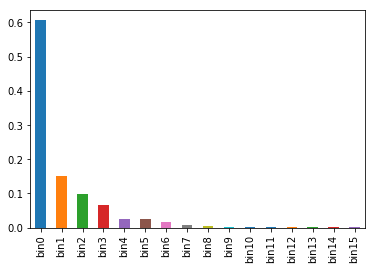

In [67]:
norm_bins = filtered_data[bin_vals].apply(lambda row: row/np.sum(row), axis=1)
norm_bins.describe().loc['mean'].plot(kind='bar')

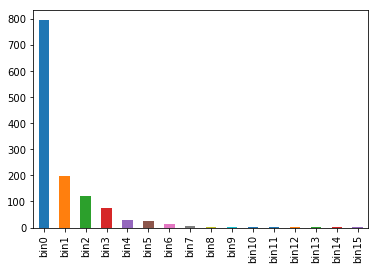

In [68]:
filtered_data[bin_vals].describe().loc['mean'].plot(kind='bar')

In [69]:
svc = SVC(kernel="rbf", gamma="auto", probability=True)
kf = KFold(len(norm_bins), n_folds=3, shuffle=True, random_state=0)

print("Accuracy:", get_training_accuracy_with_kfolds_iloc(svc, norm_bins, filtered_data['environment_index'], kf))

Accuracy: 0.699894514768


In [74]:
rf = RandomForestClassifier(random_state=0, n_estimators=50, n_jobs=-1, criterion="entropy")

kf = KFold(len(norm_bins), n_folds=3, shuffle=True, random_state=0)

print("Accuracy", get_training_accuracy_with_kfolds_iloc(rf, norm_bins, y_data, kf))

Accuracy 0.819620253165
